### Library and Data Imports

In [ ]:
!pip install skorch torch scikit-learn
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    accuracy_score,
    log_loss,
    PrecisionRecallDisplay,
    make_scorer,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import imblearn
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import cv
from xgboost import XGBClassifier
from skorch.callbacks import EarlyStopping, Checkpoint, EpochScoring
from skorch.helper import predefined_split
from sklearn.base import BaseEstimator
from skorch.callbacks import EarlyStopping, Checkpoint, EpochScoring
from google.colab import files

In [ ]:
file_id_1 = '18c5DynpKSiey55WdTBkNE7Iwb7l_HL-k'
gdown.download(f'https://drive.google.com/uc?id={file_id_1}', 'data2011.csv', quiet=False)
df1 = pd.read_csv('data2011.csv')

file_id_2 = '1bJsC9bUmrMHXlKIv82Gkl-Qxldy9D-KQ'
gdown.download(f'https://drive.google.com/uc?id={file_id_2}', 'data2102.csv', quiet=False)
df2 = pd.read_csv('data2102.csv')

file_id_3 = '1BU41bihK6rCTVWmyUFr4gEmYwIclKeMD'
gdown.download(f'https://drive.google.com/uc?id={file_id_3}', 'data2105.csv', quiet=False)
df3 = pd.read_csv('data2105.csv')

file_id_4 = '1VUA3AgnL7ouqCY3vrui7G6qr5RbbJwDQ'
gdown.download(f'https://drive.google.com/uc?id={file_id_4}', 'data2108.csv', quiet=False)
df4 = pd.read_csv('data2108.csv')

file_id_5 = '1GSL8AOlv9fWylFU-HAKbIbOCxuN1b754'
gdown.download(f'https://drive.google.com/uc?id={file_id_5}', 'data2111.csv', quiet=False)
df5 = pd.read_csv('data2111.csv')

Downloading...
From: https://drive.google.com/uc?id=1bJsC9bUmrMHXlKIv82Gkl-Qxldy9D-KQ
To: /content/data2102.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 50.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BU41bihK6rCTVWmyUFr4gEmYwIclKeMD
To: /content/data2105.csv
100%|██████████| 25.5M/25.5M [00:00<00:00, 56.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VUA3AgnL7ouqCY3vrui7G6qr5RbbJwDQ
To: /content/data2108.csv
100%|██████████| 30.0M/30.0M [00:00<00:00, 53.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GSL8AOlv9fWylFU-HAKbIbOCxuN1b754
To: /content/data2111.csv
100%|██████████| 30.5M/30.5M [00:00<00:00, 68.9MB/s]


### Data Processing

In [ ]:
## Rename Columns
def rename(df):
    return df.rename(columns={
        'RREL16': 'primary_income',
        'RREL13': 'employment_status',
        'RREL27': 'loan_purpose',
        'RREL25': 'original_term',
        'RREL30': 'current_balance',
        'RREL29': 'original_balance',
        'RREL43': 'current_interest_rate',
        'RREL42': 'interest_type',
        'RREL69': 'account_status',
        'RREL39': 'payment_due',
        'RREL67': 'arrears_balance',
        'RREL68': 'days_in_arrears',
        'RREL71': 'default_amount',
        'RREC6': 'collateral_region',
        'RREC7': 'occupancy_type',
        'RREC9': 'property_type',
        'RREC16': 'original_ltv',
        'RREC17': 'original_valuation',
        'RREC12': 'current_ltv',
        'RREC13': 'current_valuation',
        'age': 'age',
        'PrepaymentFee': 'prepayment_fee',
        'PrepaymentHistory': 'prepayment_history',
        'RREL30_t_1': 'past_balance',
        'RREL39_t_1': 'past_payment_due',
        'RREL43_t_1': 'past_interest_rate',
        'RREC12_t_1': 'past_ltv',
        'RREC13_t_1': 'past_valuation',
        'incentive': 'incentive',
        'target': 'target'
    })

In [ ]:
## Embed Categorical columns
def embed(df):
    df['employment_status'] = df['employment_status'].astype('category')
    df['loan_purpose'] = df['loan_purpose'].astype('category')
    df['collateral_region'] = df['collateral_region'].astype('category')
    df['occupancy_type'] = df['occupancy_type'].astype('category')
    df['property_type'] = df['property_type'].astype('category')
    df['interest_type'] = df['interest_type'].astype('category')
    df['account_status'] = df['account_status'].astype('category')
    df['prepayment_fee'] = df['prepayment_fee'].astype('category')
    df['prepayment_history'] = df['prepayment_history'].astype('category')
    return df

In [ ]:
# Rename and embed all datasets
df2 = rename(df2)
df2 = embed(df2)
df3 = rename(df3)
df3 = embed(df3)
df4 = rename(df4)
df4 = embed(df4)
df5 = rename(df5)
df5 = embed(df5)

In [ ]:
# Split data from targets
X1_train = df1.drop('target', axis = 1)
y1_train = df1['target']

X2_train = df2.drop('target', axis = 1)
y2_train = df2['target']

X3_train = df3.drop('target', axis = 1)
y3_train = df3['target']

X4_train = df4.drop('target', axis = 1)
y4_train = df4['target']

X5_test = df5.drop('target', axis = 1)
y5_test = df5['target']

In [ ]:
# Create training data from first four datasets
X_train = pd.concat([X1_train, X2_train, X3_train, X4_train], ignore_index=True)
y_train = pd.concat([y1_train, y2_train, y3_train, y4_train], ignore_index=True)

### Final Model Test

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[0]	validation_0-aucpr:0.03616	validation_0-logloss:0.68169


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [11:31:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[1]	validation_0-aucpr:0.03452	validation_0-logloss:0.67561
[2]	validation_0-aucpr:0.03520	validation_0-logloss:0.67103
[3]	validation_0-aucpr:0.03388	validation_0-logloss:0.66755
[4]	validation_0-aucpr:0.03474	validation_0-logloss:0.66390
[5]	validation_0-aucpr:0.03449	validation_0-logloss:0.66067
[6]	validation_0-aucpr:0.03461	validation_0-logloss:0.65674
[7]	validation_0-aucpr:0.03499	validation_0-logloss:0.65421
[8]	validation_0-aucpr:0.03496	validation_0-logloss:0.65170
[9]	validation_0-aucpr:0.03443	validation_0-logloss:0.64926
[10]	validation_0-aucpr:0.03438	validation_0-logloss:0.64743
[11]	validation_0-aucpr:0.03470	validation_0-logloss:0.64565
[12]	validation_0-aucpr:0.03453	validation_0-logloss:0.64448
[13]	validation_0-aucpr:0.03432	validation_0-logloss:0.64309
[14]	validation_0-aucpr:0.03440	validation_0-logloss:0.64094
[15]	validation_0-aucpr:0.03451	validation_0-logloss:0.63857
[16]	validation_0-aucpr:0.03443	validation_0-logloss:0.63729
[17]	validation_0-aucpr:0.03480	v

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x600 with 0 Axes>

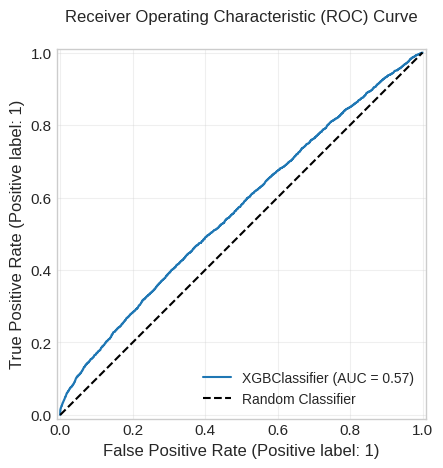

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x600 with 0 Axes>

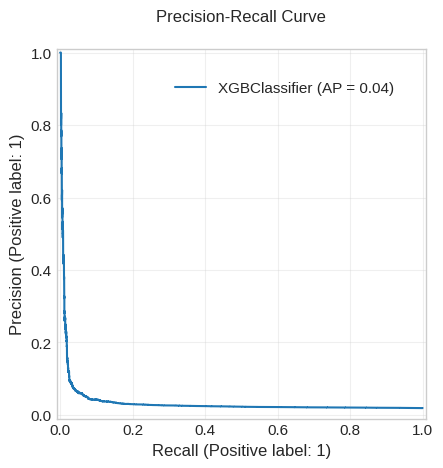

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

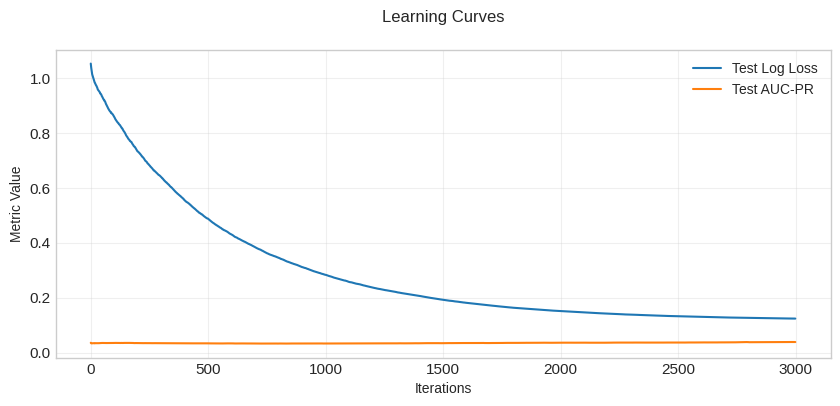

In [ ]:
# Enhanced XGBoost with comprehensive tuning for imbalanced data
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [50, 100],
    'n_estimators': [1000, 2000, 4000, 8000]
}

# Set up XGBoost without early stopping in the initializer
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric=['aucpr', 'logloss'],
    enable_categorical=True,
    use_label_encoder=False,
    verbosity=0,
    random_state=42
)

# 5-Fold Stratified Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring for imbalanced data
scoring = {
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'aucpr': 'average_precision'
}

# RandomizedSearchCV
grid = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=30,  # Reduced for faster execution
    scoring=scoring,
    refit='aucpr',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True
)

# Fit without early stopping in grid search
grid.fit(X_train, y_train)

# Now train final model using best params
best_params = grid.best_params_.copy()


final_model = xgb.XGBClassifier(
    **best_params,
    objective='binary:logistic',
    eval_metric=['aucpr', 'logloss'],
    early_stopping_rounds=50,
    enable_categorical=True,
    use_label_encoder=False,
    verbosity=1,
    random_state=42
)

# Now apply early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X5_test, y5_test)],
    verbose=True
)
# Best model
print("Best Parameters:", grid.best_params_)

# Evaluate on test set with optimal threshold
y_proba = final_model.predict_proba(X5_test)[:, 1]

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y5_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
y_pred = (y_proba >= optimal_threshold).astype(int)

# Metrics
print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y5_test, y_pred)}")
print(f"Precision: {precision_score(y5_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y5_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y5_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC:   {roc_auc_score(y5_test, y_proba):.4f}")
print(f"PR AUC:    {average_precision_score(y5_test, y_proba):.4f}")

# ROC Curve (new addition)
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(final_model, X5_test, y5_test)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12, pad=20)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Precision-Recall Curve (legend moved)
plt.figure(figsize=(8, 6))
disp = PrecisionRecallDisplay.from_estimator(final_model, X5_test, y5_test)
plt.title('Precision-Recall Curve', fontsize=12, pad=20)
plt.grid(True, alpha=0.3)

# Move the legend to upper right (no new legend created)
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), framealpha=1)

# 3. Learning curves (with download)
plt.figure(figsize=(10, 4))
plt.plot(results['validation_0']['logloss'], label='Test Log Loss', color='#1f77b4')
plt.plot(results['validation_0']['aucpr'], label='Test AUC-PR', color='#ff7f0e')
plt.xlabel('Iterations', fontsize=10)
plt.ylabel('Metric Value', fontsize=10)
plt.title('Learning Curves', fontsize=12, pad=20)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)